# Clasificación con Naive Bayes: Guía Paso a Paso

En este notebook exploraremos cómo utilizar **Naive Bayes** para resolver problemas de clasificación. Este modelo es simple pero poderoso, especialmente en problemas donde las características tienen independencia condicional. 

El algoritmo se basa en el **Teorema de Bayes** y utiliza la probabilidad para clasificar ejemplos en clases.

---

### **Objetivos**
1. Generar y preparar un conjunto de datos sintético.
2. Entrenar un modelo básico de Naive Bayes.
3. Evaluar el modelo utilizando métricas estándar.
4. Ajustar hiperparámetros clave para mejorar el rendimiento.
5. Implementar validación cruzada para comprobar la estabilidad del modelo.

---

### **Modelo Naive Bayes**

**Definición:**
El modelo **Naive Bayes** asume que todas las características son independientes entre sí y aplica el Teorema de Bayes para calcular la probabilidad de cada clase, dado un conjunto de características.



**Ventajas:**
- Rápido y eficiente.
- Funciona bien con datos categóricos o numéricos.
- Fácil de implementar.

**Limitaciones:**
- La suposición de independencia puede no ser realista.
- Puede no manejar bien relaciones no lineales entre características.

---

### **Tipologías de Naive Bayes**
1. **GaussianNB:** Supone que los datos son distribuidos normalmente. Ideal para características continuas.
2. **MultinomialNB:** Adecuado para datos categóricos y frecuencias, como en problemas de clasificación de texto.
3. **BernoulliNB:** Trabaja con datos binarios (0/1), útil en modelos de presencia/ausencia.

En este notebook, usaremos **GaussianNB**, ya que nuestros datos son numéricos y continuos.


---

## **Paso a Paso del Análisis**

### **1. Importar Librerías**
Importamos todas las herramientas necesarias para manipular datos, entrenar el modelo y realizar las evaluaciones.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt


---

### **2. Generar Datos**
Utilizamos la función `make_classification` de `sklearn` para crear un conjunto de datos sintético. Este dataset tiene:
- 1000 muestras.
- 10 características, de las cuales 8 son informativas y 2 redundantes.

También dividimos los datos en conjuntos de entrenamiento y prueba usando `train_test_split`.

In [14]:
from sklearn.datasets import make_classification

# Generar datos sintéticos
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=8, n_redundant=2, random_state=42
)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir a DataFrame para facilitar la visualización
df = pd.DataFrame(X, columns=[f"Feature_{i+1}" for i in range(10)])
df['Target'] = y  # Añadir la columna objetivo

# Mostrar las primeras filas
print(df.head())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  -0.224515  -0.648598   2.805591   0.569525   2.676771   0.685312   
1   1.038548  -1.316803   2.303387   1.233593   4.972675   1.086905   
2   1.148988   1.794382   2.835693  -1.114858  -1.247120  -1.899268   
3  -1.177318   2.420294  -0.363514  -1.086646  -2.824750  -2.722123   
4   1.346717   0.089373   2.056613  -0.428365   0.285387   1.140716   

   Feature_7  Feature_8  Feature_9  Feature_10  Target  
0   0.306675   1.147291  -2.145905    2.477879       1  
1  -3.548788   0.342810  -0.469005    2.787109       1  
2  -0.381470   0.837209   0.163223   -0.997959       1  
3  -0.225266   0.515079  -3.317272   -2.801517       1  
4   0.721945   1.110152   2.426608    0.880496       0  


---

### **3. Entrenar el Modelo**
Entrenamos un modelo básico de Naive Bayes Gaussiano (`GaussianNB`) con el conjunto de entrenamiento. Después, realizamos predicciones sobre el conjunto de prueba.

In [3]:
# Entrenar el modelo Naive Bayes Gaussiano
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = nb_model.predict(X_test)

# Evaluación inicial
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       106
           1       0.71      0.80      0.75        94

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.76      0.75      0.75       200




### Interpretación:
1. **Clase 0:**
   - **Precisión (0.80):** El 80% de las predicciones como clase 0 fueron correctas.
   - **Recall (0.71):** El modelo identificó correctamente el 71% de las instancias reales de clase 0.
   - **F1-Score (0.75):** Equilibrio aceptable entre precisión y recall.

2. **Clase 1:**
   - **Precisión (0.71):** El 71% de las predicciones como clase 1 fueron correctas.
   - **Recall (0.80):** El modelo identificó correctamente el 80% de las instancias reales de clase 1.
   - **F1-Score (0.75):** Similar a la clase 0, con un rendimiento moderado.

3. **General:**
   - **Accuracy (0.75):** El modelo predijo correctamente el 75% de las instancias totales.
   - **Macro Avg:** Representa el promedio no ponderado entre las clases, indicando un desempeño equilibrado.
   - **Weighted Avg:** Tiene en cuenta el soporte de cada clase, mostrando un leve sesgo hacia la clase 0.

### Conclusión:
El modelo muestra un rendimiento aceptable, aunque podría beneficiarse de ajustes en hiperparámetros o técnicas para mejorar el equilibrio entre precisión y recall.


---

### Paso 4: Evaluar el Modelo

Después de entrenar el modelo, evaluamos los resultados con una **Matriz de Confusión**, que muestra:
- **Verdaderos Positivos (TP):** Casos correctamente clasificados como positivos.
- **Falsos Positivos (FP):** Casos clasificados como positivos que en realidad son negativos.
- **Verdaderos Negativos (TN):** Casos correctamente clasificados como negativos.
- **Falsos Negativos (FN):** Casos clasificados como negativos que en realidad son positivos.

Esta evaluación ayuda a identificar el tipo de errores que está cometiendo el modelo.


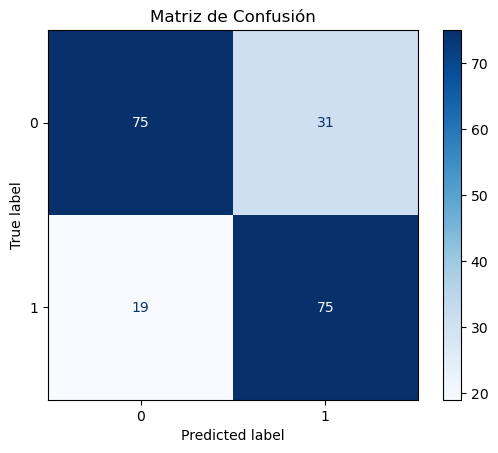

In [4]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()


## Estructura de la Matriz

- **Eje vertical (True label):** Representa las clases reales del conjunto de datos (0 y 1).
- **Eje horizontal (Predicted label):** Representa las clases predichas por el modelo (0 y 1).

---

## Valores de la Matriz

1. **75 (arriba a la izquierda - Verdaderos Positivos para Clase 0):**  
   El modelo predijo correctamente 75 instancias como clase 0, y estas pertenecen realmente a la clase 0.

2. **31 (arriba a la derecha - Falsos Negativos para Clase 0):**  
   El modelo predijo incorrectamente 31 instancias como clase 1, cuando en realidad pertenecían a la clase 0.

3. **19 (abajo a la izquierda - Falsos Positivos para Clase 1):**  
   El modelo predijo incorrectamente 19 instancias como clase 0, cuando en realidad pertenecían a la clase 1.

4. **75 (abajo a la derecha - Verdaderos Positivos para Clase 1):**  
   El modelo predijo correctamente 75 instancias como clase 1, y estas pertenecen realmente a la clase 1.


## Análisis

### Desempeño General:
- El modelo tiene una **exactitud global del 75%**, lo que indica un rendimiento aceptable, pero no perfecto.

### Errores Cometidos:
1. **Falsos Negativos (31 para Clase 0):**  
   Indican que el modelo está pasando por alto instancias de la clase 0 al clasificarlas incorrectamente como clase 1.

2. **Falsos Positivos (19 para Clase 1):**  
   Indican que el modelo está clasificando incorrectamente algunas instancias de la clase 1 como clase 0.

### Recomendaciones:
Optimización:

Ajustar el umbral de clasificación si es necesario para priorizar precisión o recall según el problema.
Probar técnicas como el balanceo de clases (si están desbalanceadas) o el ajuste de hiperparámetros.

### Paso 5: Ajustar el Umbral de Clasificación

Por defecto, los modelos clasifican basándose en un umbral de 0.5 para la probabilidad de pertenecer a una clase positiva. Sin embargo:
- Para **priorizar precisión**, aumentamos el umbral (por ejemplo, 0.7).
- Para **priorizar recall**, disminuimos el umbral (por ejemplo, 0.3).

A continuación, ajustamos el umbral y observamos el impacto en las métricas.


In [16]:
# devuelve las probabilidades predichas de pertenecer a cada clase para 
# cada muestra en el conjunto de prueba

y_probs = nb_model.predict_proba(X_test)[:, 1]

# Ajustar el umbral a 0.7 para priorizar precisión
new_threshold = 0.7
y_pred_threshold = (y_probs >= new_threshold).astype(int)

# Evaluar el modelo con el nuevo umbral
print("Reporte de Clasificación con umbral ajustado:")
print(classification_report(y_test, y_pred_threshold))


Reporte de Clasificación con umbral ajustado:
              precision    recall  f1-score   support

           0       0.68      0.90      0.78       106
           1       0.82      0.53      0.65        94

    accuracy                           0.72       200
   macro avg       0.75      0.71      0.71       200
weighted avg       0.75      0.72      0.71       200



### Paso 6: Visualizar el Impacto del Umbral

Para entender mejor cómo afecta el umbral a la precisión y al recall, graficamos ambas métricas en función del umbral. Esto permite seleccionar el valor óptimo según las prioridades del problema.


C:\Users\maike\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\maike\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\maike\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\maike\anaconda3\Lib\site-packag

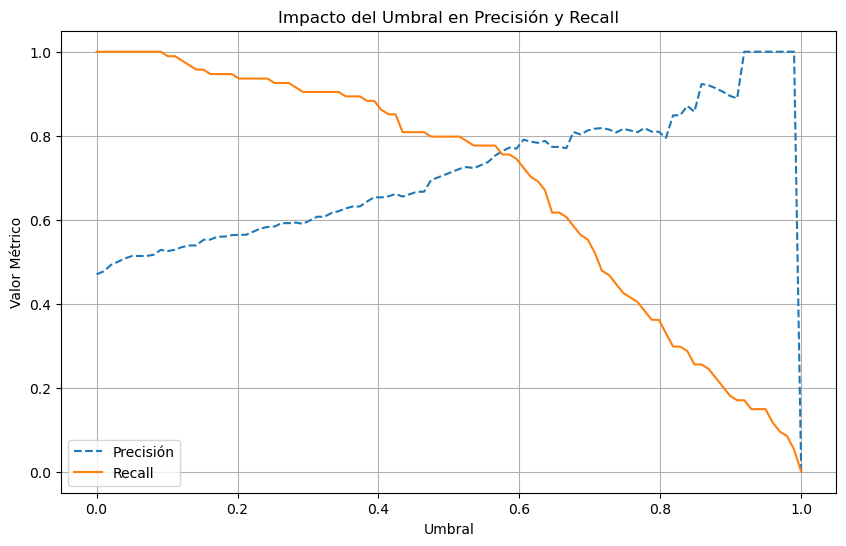

In [6]:
thresholds = np.linspace(0, 1, 100)
precision = []
recall = []

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    report = classification_report(y_test, y_pred_t, output_dict=True)
    precision.append(report['1']['precision'])
    recall.append(report['1']['recall'])

# Graficar precisión y recall contra el umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label='Precisión', linestyle='--')
plt.plot(thresholds, recall, label='Recall', linestyle='-')
plt.xlabel('Umbral')
plt.ylabel('Valor Métrico')
plt.title('Impacto del Umbral en Precisión y Recall')
plt.legend()
plt.grid(True)
plt.show()


## Observaciones

### **Precisión (línea azul, discontinua):**
- **Crecimiento:**  
  A medida que el umbral aumenta, la precisión tiende a mejorar.  
  Esto ocurre porque un umbral más alto reduce el número de falsos positivos, lo que significa que la clase positiva (predicha) es más confiable.

- **Comportamiento extremo (umbral cercano a 1):**  
  La precisión alcanza su valor más alto, pero esto sucede a costa de un recall muy bajo, ya que el modelo predice muy pocas instancias como positivas.

---

### **Recall (línea naranja, continua):**
- **Decrecimiento:**  
  A medida que el umbral aumenta, el recall disminuye.  
  Esto ocurre porque el modelo clasifica menos instancias como positivas, lo que genera un aumento de falsos negativos.

- **Comportamiento extremo (umbral cercano a 0):**  
  El recall alcanza su valor más alto, ya que casi todas las instancias son clasificadas como positivas.  
  Sin embargo, esto afecta negativamente la precisión debido al incremento de falsos positivos.

---

### **Punto de Equilibrio:**
- Existe un punto donde las métricas están relativamente balanceadas (por ejemplo, en el intervalo de umbrales alrededor de 0.5).  
  Este punto representa un buen compromiso entre precisión y recall para aplicaciones generales.

---

## Interpretación Práctica

### **Elegir el Umbral Adecuado:**
- **Alta Precisión:**  
  En problemas donde los falsos positivos son costosos (e.g., diagnósticos médicos erróneos que generan estrés innecesario), se podría elegir un umbral más alto.

- **Alto Recall:**  
  En problemas donde es crucial no pasar por alto instancias positivas (e.g., detección de fraude), se podría elegir un umbral más bajo.

---

### **Compromiso entre Métricas:**
- En muchos problemas, un equilibrio entre precisión y recall (como el valor 0.5) es deseable.  
  Esto es especialmente cierto si ambas clases tienen igual importancia.


### Paso 7: Balancear Clases

Si las clases están desbalanceadas, el modelo puede tener un sesgo hacia la clase mayoritaria. Esto puede solucionarse con técnicas como:
1. **Pesos balanceados:** Ajustar la importancia de cada clase en la función de pérdida.
2. **Sobremuestreo:** Generar más ejemplos sintéticos de la clase minoritaria.
3. **Submuestreo:** Reducir el número de ejemplos en la clase mayoritaria.

En este paso, medimos el **balanceo de pesos** 

In [18]:
from sklearn.utils.class_weight import compute_class_weight

# Calcular pesos balanceados
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weights_dict = dict(zip(np.unique(y_train), class_weights))
print("Pesos calculados para las clases:", weights_dict)


Pesos calculados para las clases: {0: 1.015228426395939, 1: 0.9852216748768473}


### Interpretación de los Pesos

- **Cuando los pesos están cerca de 1,** el modelo no necesita compensar significativamente las diferencias entre las clases.

- **En tu caso:**
  - **Clase 0:** Tiene una ligera menor representación (peso mayor: 1.015).
  - **Clase 1:** Tiene una ligera mayor representación (peso menor: 0.985).

- **Conclusión:**
  Esto indica un desbalance insignificante, lo que es bueno para el modelo, ya que ambas clases están casi equilibradas en el conjunto de datos.


In [ ]:
!pip install --upgrade scikit-learn imbalanced-learn
!conda create -n nuevo_entorno python=3.9
!conda activate nuevo_entorno
!conda install scikit-learn imbalanced-learn -c conda-forge


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/d8/0d/c3bfccc5d460eec8ff56889802aa88f5d07280d5282b307a74558e6edc44/imbalanced_learn-0.12.4-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [17]:

from imblearn.over_sampling import SMOTE
from collections import Counter

# Antes del balanceo
print("Distribución de clases antes del balanceo:", Counter(y_train))

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Después del balanceo
print("Distribución de clases después del balanceo:", Counter(y_train_balanced))

Distribución de clases antes del balanceo: Counter({1: 406, 0: 394})
Distribución de clases después del balanceo: Counter({0: 406, 1: 406})


### Paso 8: Visualizar la Curva ROC

La **curva ROC** evalúa el rendimiento del modelo en términos de:
- **TPR (True Positive Rate o Sensibilidad):** Qué porcentaje de casos positivos se identificaron correctamente.
- **FPR (False Positive Rate):** Qué porcentaje de casos negativos se clasificaron erróneamente como positivos.

El área bajo la curva (AUC) mide la capacidad del modelo para separar las clases. Un AUC cercano a 1 indica un buen modelo.



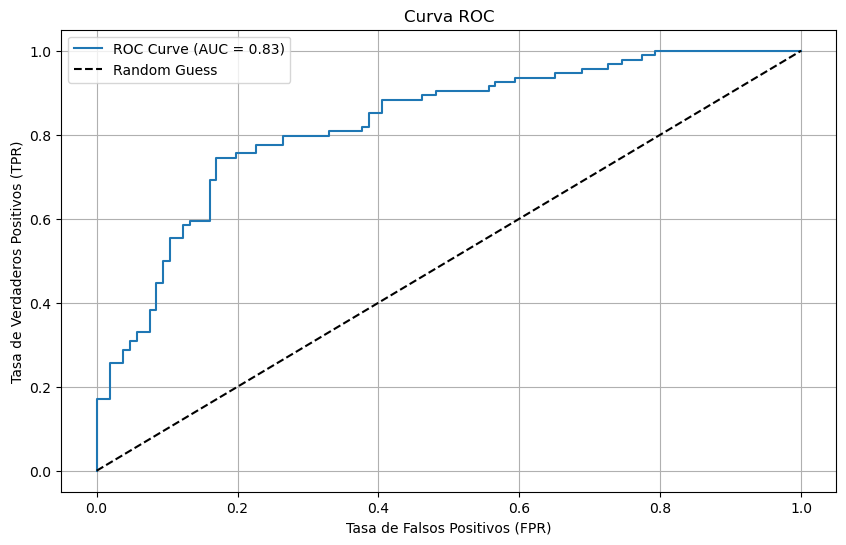

In [9]:
# Calcular probabilidades para la curva ROC
y_probs = nb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Graficar curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()


### Paso 9: Ajustar Hiperparámetros

El parámetro más importante para **Naive Bayes** es:
- **`var_smoothing`:** Un factor de regularización para evitar problemas numéricos al calcular probabilidades muy pequeñas.

Usamos `GridSearchCV` para encontrar el mejor valor de este hiperparámetro. En este caso, buscamos maximizar la métrica de **recall** en un conjunto balanceado.



In [10]:
# Repetir GridSearchCV con el dataset balanceado
param_grid = {
    'var_smoothing': np.logspace(-9, -1, 10)
}

grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_balanced, y_train_balanced)

# Imprimir resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación (recall):", grid_search.best_score_)

# Reentrenar con los mejores parámetros
best_model = grid_search.best_estimator_


Mejores parámetros: {'var_smoothing': 0.1}
Mejor puntuación (recall): 0.7711833785004517


### Paso 10: Validación Cruzada

La validación cruzada divide el dataset en **k partes** y entrena el modelo usando \(k-1\) partes, dejando una para validación. Esto permite evaluar la estabilidad del modelo en diferentes particiones de los datos.

En este caso, usamos 10 folds y calculamos la métrica de **recall**.


In [11]:
# Validación cruzada con el mejor modelo
cv_scores = cross_val_score(best_model, X, y, cv=10, scoring='recall')
print("Puntajes de validación cruzada:", cv_scores)
print("Media de validación cruzada:", np.mean(cv_scores))


Puntajes de validación cruzada: [0.76 0.8  0.84 0.8  0.72 0.76 0.78 0.86 0.8  0.9 ]
Media de validación cruzada: 0.8019999999999999


En problemas críticos como diagnóstico médico, un puntaje de 80% puede ser insuficiente.
En problemas generales (como predicción de tendencias), es más que aceptable.

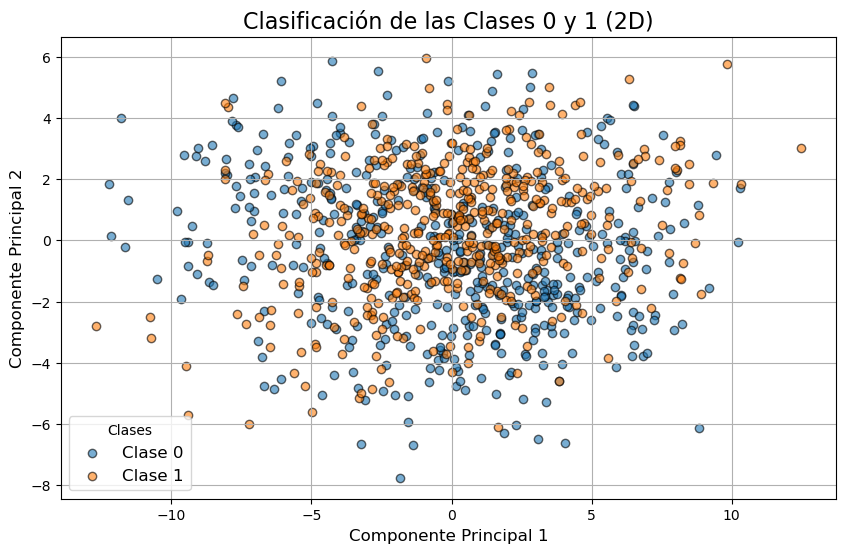

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Reducir dimensiones a 2D usando PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Gráfico detallado para mostrar la clasificación de las clases 0 y 1
plt.figure(figsize=(10, 6))

# Graficar puntos para cada clase
for class_value in np.unique(y):
    indices = np.where(y == class_value)
    plt.scatter(
        X_reduced[indices, 0], X_reduced[indices, 1],
        label=f'Clase {class_value}', alpha=0.6, edgecolor='k'
    )

# Etiquetas y leyenda
plt.title("Clasificación de las Clases 0 y 1 (2D)", fontsize=16)
plt.xlabel("Componente Principal 1", fontsize=12)
plt.ylabel("Componente Principal 2", fontsize=12)
plt.legend(title="Clases", fontsize=12)
plt.grid(True)
plt.show()


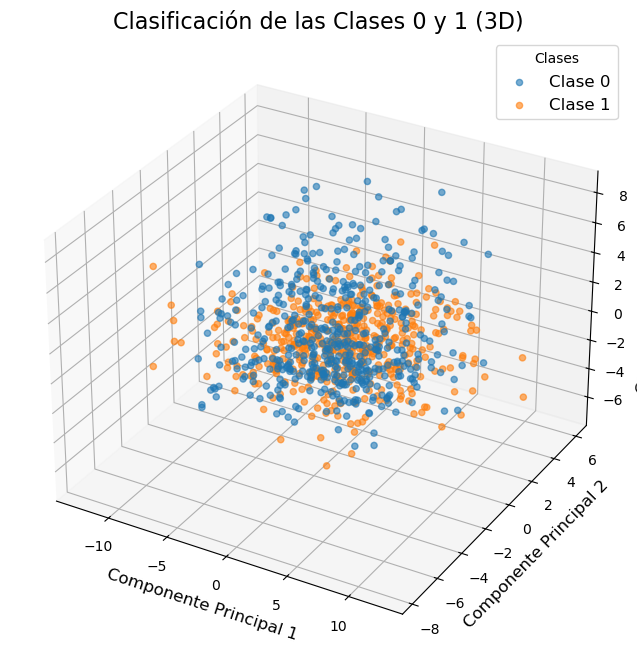

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# Reducir dimensiones a 3D usando PCA
pca_3d = PCA(n_components=3)
X_reduced_3d = pca_3d.fit_transform(X)

# Crear un gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar puntos para cada clase
for class_value in np.unique(y):
    indices = np.where(y == class_value)
    ax.scatter(
        X_reduced_3d[indices, 0], X_reduced_3d[indices, 1], X_reduced_3d[indices, 2],
        label=f'Clase {class_value}', alpha=0.6
    )

# Etiquetas y leyenda
ax.set_title("Clasificación de las Clases 0 y 1 (3D)", fontsize=16)
ax.set_xlabel("Componente Principal 1", fontsize=12)
ax.set_ylabel("Componente Principal 2", fontsize=12)
ax.set_zlabel("Componente Principal 3", fontsize=12)
ax.legend(title="Clases", fontsize=12)
plt.show()
